In [1]:
# Implement a Lax-Friedrichs solver
# Environment configuration
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xBins = 100
xLength = 1.0
deltaX = xLength/xBins
x = np.arange(0,xBins)
x = x*deltaX
print(x)
print(deltaX)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
0.01


In [3]:
# Implement the beam warming solution to the differential equation dt(u) + dx(u) = 0

def uNextFromm(u,deltaT):
    dTdX = deltaT/deltaX
    up1 = np.roll(u,-1)
    up2 = np.roll(u,-2)
    um1 = np.roll(u,1)
    um2 = np.roll(u,2)
    fp12 = u - 0.25*(um1 - up1) - 0.5*dTdX*(u - um1)
    fm12 = um1 - 0.25*(um2-u) - 0.5*dTdX*(um1-um2)
    temp = u + dTdX*(fm12-fp12)
    return temp

def uNextBW(u,deltaT):
    dTdX = deltaT/deltaX
    up1 = np.roll(u,-1)
    up2 = np.roll(u,-2)
    um1 = np.roll(u,1)
    um2 = np.roll(u,2)
    fp12 = 0.5*(3.0*u - um1) - 0.5*dTdX*(u - um1)
    fm12 = 0.5*(3.0*um1-um2) - 0.5*dTdX*(um1-um2)
    temp = 0.5*(up1+um1) - (0.5*deltaT/deltaX)*(up1-um1)
    return temp

def uNextLaxF(u,deltaT):
    up1 = np.roll(u,-1)
    um1 = np.roll(u,1)
    temp = 0.5*(up1+um1) - (0.5*deltaT/deltaX)*(up1-um1)
    return temp

def uNextLaxW(u,deltaT):
    up1 = np.roll(u,1)
    um1 = np.roll(u,-1)
    temp = u - (0.5*deltaT/deltaX)*(up1-um1) + (0.5*deltaT*deltaT/(deltaX*deltaX))*(up1 - 2.0*u + um1)
    return temp

def uNextUpwind(u,deltaT):
    up1 = np.roll(u,1)
    um1 = np.roll(u,-1)
    temp = u - (0.5*deltaT/deltaX)*(up1-um1) + (0.5*deltaT*deltaT/(deltaX*deltaX))*(up1 - 2.0*u + um1)
    return temp

# Implement the initial condition
def IC(vec,bins):
    halfPoint = int(bins/2)
    vec[:halfPoint] = 1.0
    vec[halfPoint:] = 0.0
    return vec

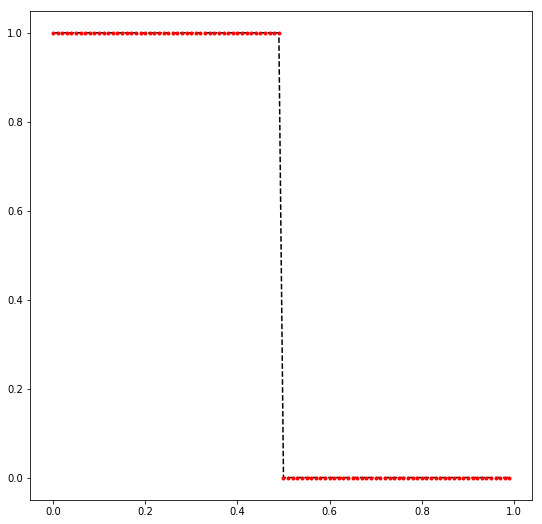

In [4]:
# Implement the initial condition
u = np.zeros(x.shape)
u = IC(u,xBins)
uLaxF = uLaxW = uBW = uFromm = uUpwind = u

plt.figure(figsize=(9,9))
plt.plot(x,u,'k--')
plt.plot(x,uLaxF,'r.')
plt.show()

5


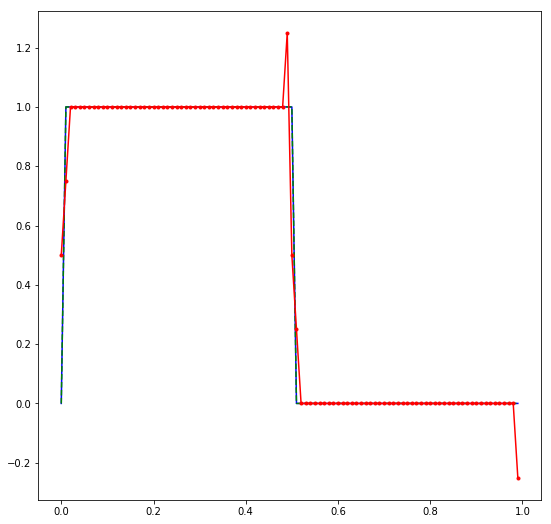

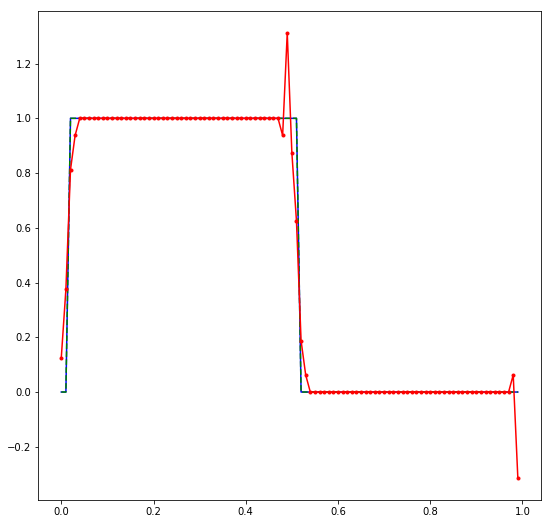

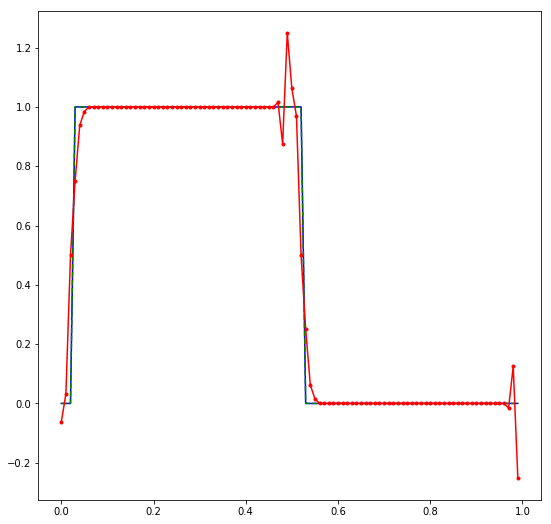

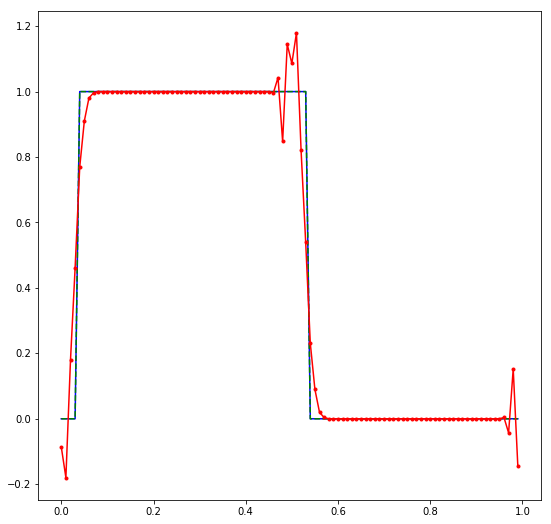

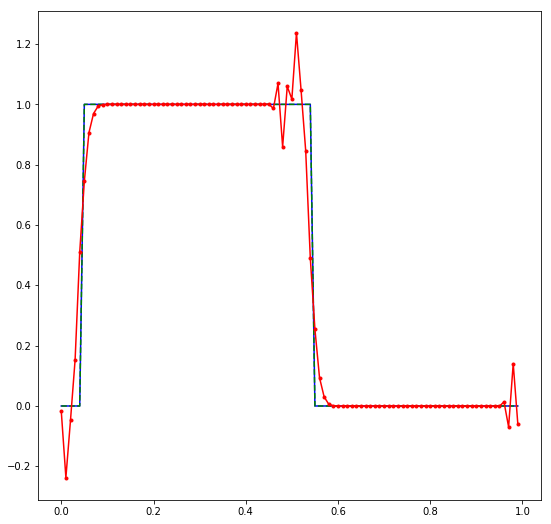

0.05


In [9]:
dt = 1.0e-2

u = IC(u,xBins)
uLaxF = uLaxW = uBW = uFromm = uUpwind = u
tFinal = 0.05
tBins = int(np.ceil(tFinal/dt))
print(tBins)

for iii in range(1,tBins+1):
    time = dt*iii
    uBW = uNextBW(uBW,dt)
    uFromm = uNextFromm(uFromm,dt)
    uLaxF = uNextLaxF(uLaxF,dt)
    plt.figure(figsize=(9,9))
    plt.plot(x,uLaxF,'b')
    plt.plot(x,uBW,'g--')
    plt.plot(x,uFromm,'r.-')
    plt.show()
    plt.pause(0.01)
    
    
print(time)

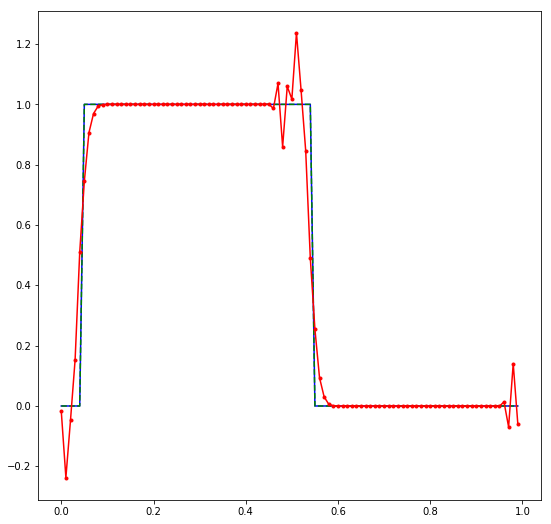

In [8]:
plt.figure(figsize=(9,9))
plt.plot(x,uLaxF,'b')
plt.plot(x,uBW,'g--')
plt.plot(x,uFromm,'r.-')

plt.show()